### LIBRERIAS\

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, BayesianRidge, HuberRegressor, SGDRegressor, LogisticRegression, Perceptron
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# ACTIVIDAD 1: Relación entre minutos e ingreso

- Cargar la base de datos

In [89]:
df = pd.read_csv('https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/Cuadernos/Clase%202/Bases/Credito_dias.csv')

[texto del enlace](https://)- Mostrar las primeras filas y la informacion del dataset

In [90]:
df.head()

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


-  Filtrar valores únicos y eliminar filas con valores nulos en 'creditcd'

1.   Elemento de lista
2.   Elemento de lista




In [92]:
df['creditcd'].unique()
df.dropna(subset=['creditcd'], inplace=True)
df[df['creditcd'].isnull()]

,totmou,totrev,creditcd,eqpdays,Customer_ID


[texto del enlace](https://)- Convertir la columna 'totmou' a tipo entero y mostrar información estadística

In [93]:
df['totmou'] = df['totmou'].astype(int)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9848 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       9848 non-null   int32  
 1   totrev       9848 non-null   float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      9848 non-null   int64  
 4   Customer_ID  9848 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 423.2+ KB


In [95]:
df.describe()

,totmou,totrev,eqpdays,Customer_ID
count,9848.000000,9848.000000,9848.000000,9.848000e+03
mean,7697.898964,1042.302115,386.982433,1.049854e+06
std,8662.005853,857.945971,252.473800,2.875331e+04
min,0.000000,11.100000,-5.000000,1.000014e+06
25%,2575.000000,526.627500,210.000000,1.024992e+06
50%,5261.500000,820.955000,338.000000,1.049404e+06
75%,9842.000000,1272.975000,523.000000,1.074646e+06
max,163264.000000,13426.600000,1823.000000,1.099992e+06


- Visualización de la distribución de 'totmou' y 'creditcd'


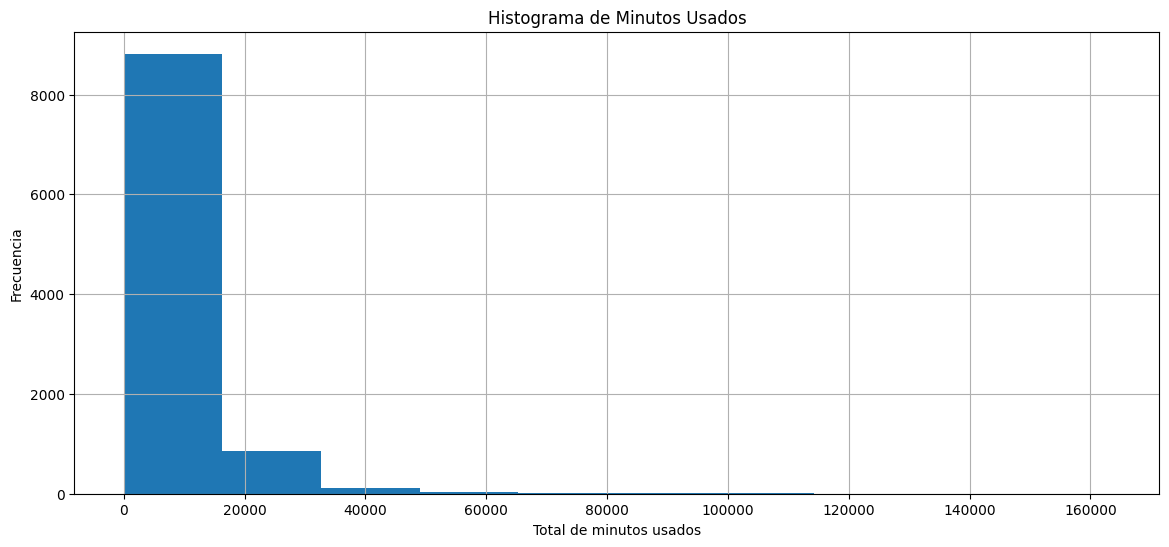

In [96]:
plt.figure(figsize=(14, 6))
df['totmou'].hist()
plt.xlabel('Total de minutos usados')
plt.ylabel('Frecuencia')
plt.title('Histograma de Minutos Usados')
plt.show()

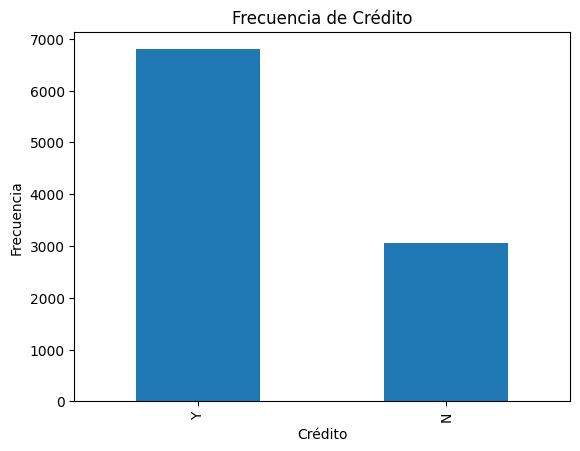

In [97]:
df['creditcd'].value_counts().plot(kind='bar')
plt.xlabel('Crédito')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Crédito')
plt.show()

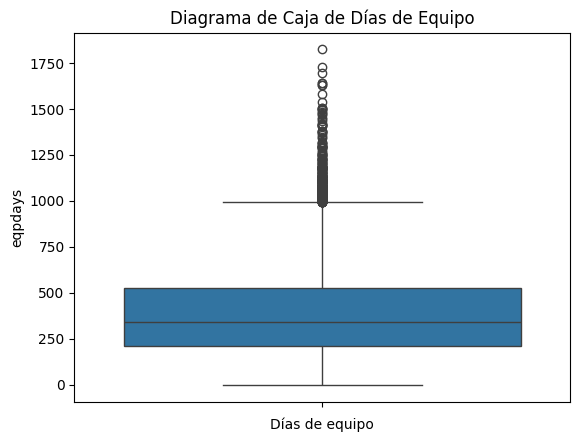

In [98]:
sns.boxplot(df['eqpdays'])
plt.xlabel('Días de equipo')
plt.title('Diagrama de Caja de Días de Equipo')
plt.show()

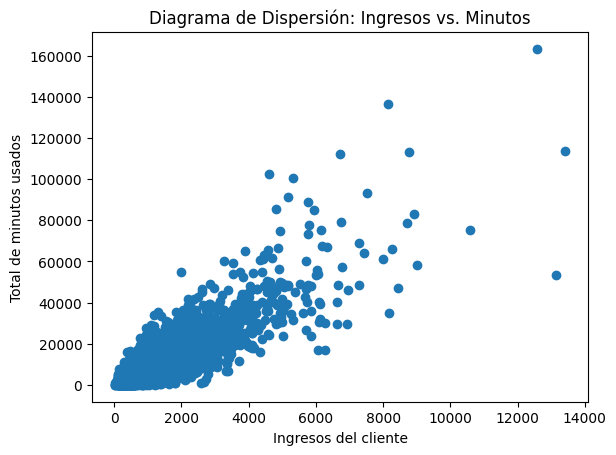

In [99]:
plt.scatter(df['totrev'], df['totmou'])
plt.xlabel('Ingresos del cliente')
plt.ylabel('Total de minutos usados')
plt.title('Diagrama de Dispersión: Ingresos vs. Minutos')
plt.show()

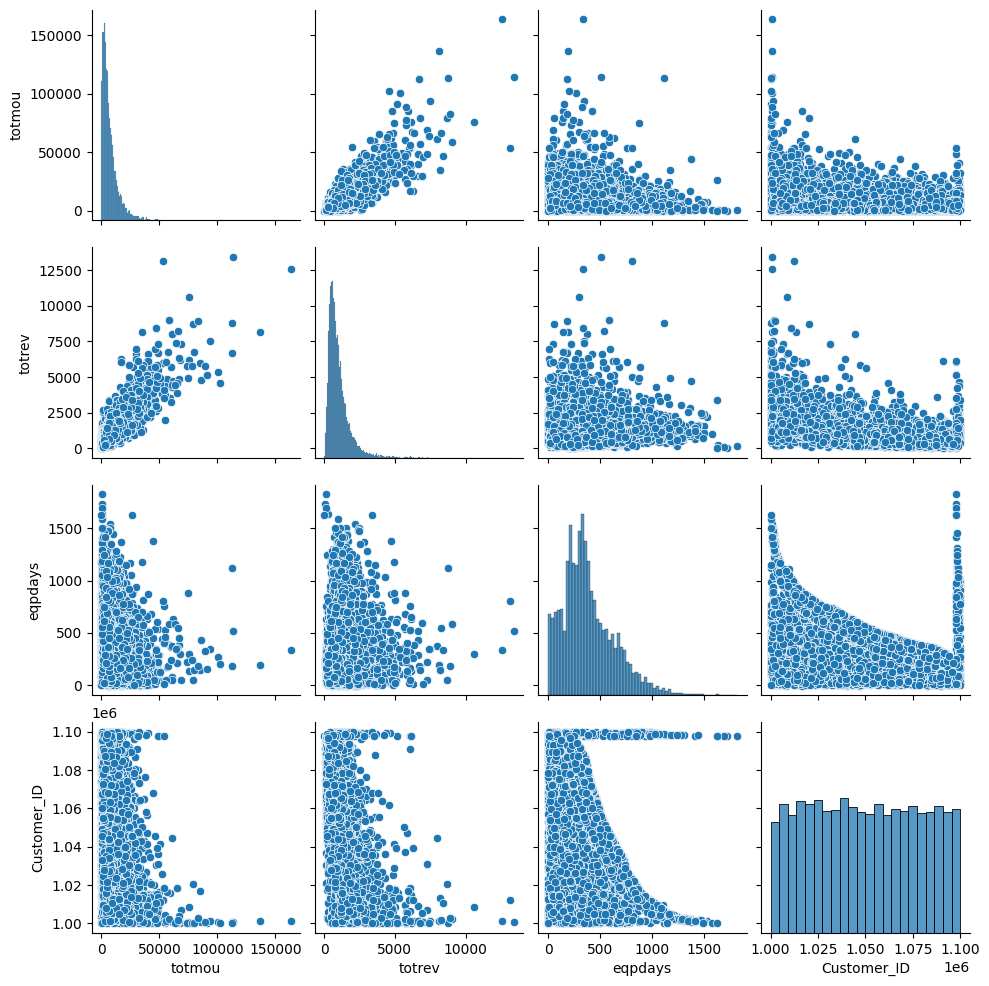

In [100]:
sns.pairplot(df)

# ACTIVIDAD 2

## Regresión Lineal:

- Cargar la base de datos

In [101]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

- Mostrar las primeras filas y la información del dataset

In [102]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [104]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- Preprocesamiento de datos

In [105]:
quantile_sulphates = data['sulphates'].quantile(q = 0.96)
data = data[~(data['sulphates']>quantile_sulphates)]
quantile_sulfur_dioxide = data['total sulfur dioxide'].quantile(q = 0.90)
data = data[~(data['total sulfur dioxide']>quantile_sulfur_dioxide)]
data = data.drop('residual sugar', axis=1)
data = data.drop('chlorides', axis=1)

- Visualización de datos estadísticos y diagramas de caja

In [106]:
data.describe()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,8.344501,0.525543,0.261302,14.564761,37.929088,0.996702,3.323249,0.639906,10.491184,5.680174
std,1.791967,0.180415,0.195820,9.441633,21.529068,0.001863,0.151123,0.120311,1.064580,0.817370
min,4.600000,0.120000,0.000000,1.000000,6.000000,0.990200,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.080000,7.000000,20.000000,0.995510,3.220000,0.550000,9.600000,5.000000
50%,7.900000,0.515000,0.240000,12.000000,34.000000,0.996675,3.320000,0.620000,10.300000,6.000000
75%,9.300000,0.640000,0.420000,19.000000,52.000000,0.997800,3.410000,0.720000,11.200000,6.000000
max,15.900000,1.580000,0.790000,54.000000,91.000000,1.003200,4.010000,0.970000,14.900000,8.000000


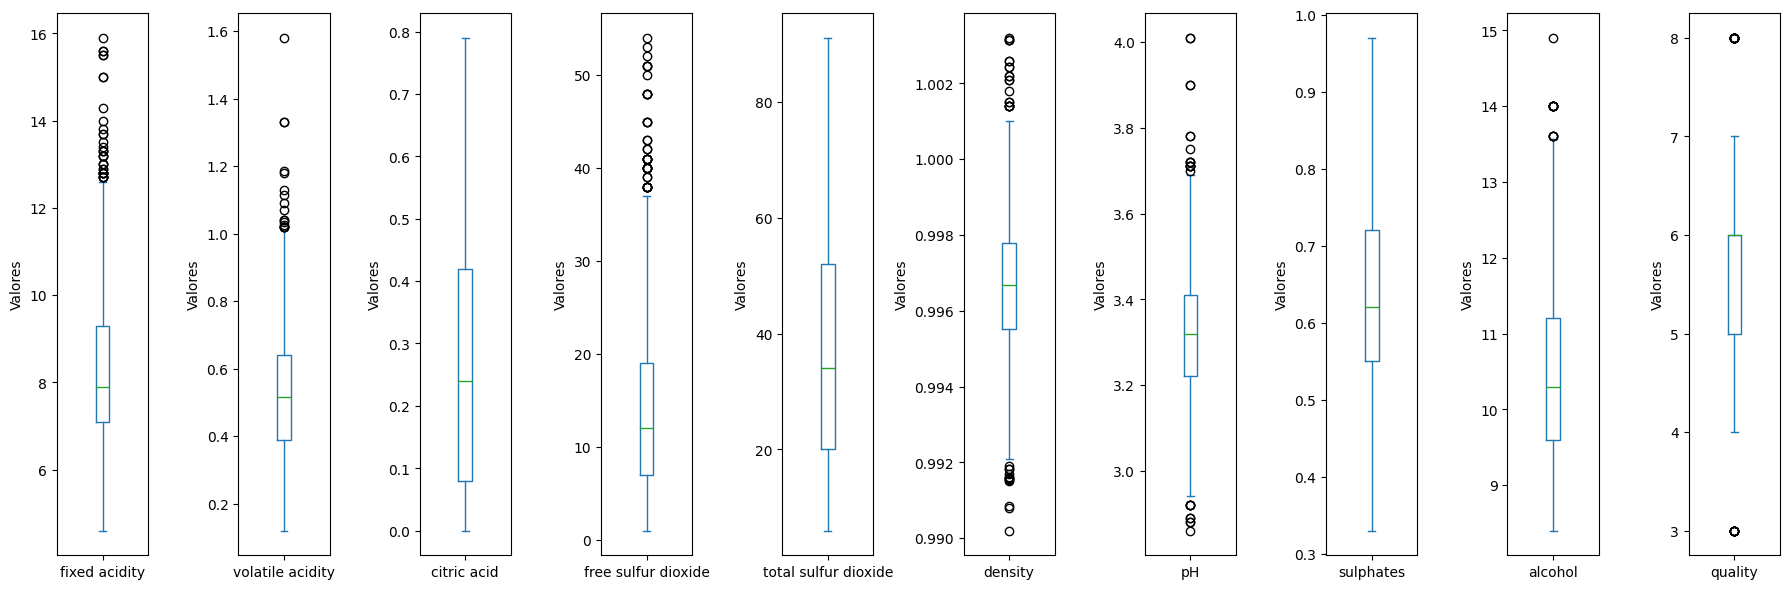

In [107]:
fig, axs = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(18, 6))
for i, column in enumerate(data.columns):
      data[column].plot(kind='box', ax=axs[i], fontsize=10)
      axs[i].set_ylabel('Valores', fontsize=10)
plt.tight_layout()
plt.show()

- Dividir los datos en características (X) y etiquetas (y) y escalar


In [108]:
y = data['quality']
X = data.drop('quality', axis=1)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

In [110]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train = pd.DataFrame(scalar.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scalar.transform(X_test), index=X_test.index, columns=X_test.columns)

- Entrenar modelos de regresión lineal y mostrar resultados

In [111]:
models = {
    "Ridge": Ridge(),
    "BayesianRidge": BayesianRidge(),
    "HuberRegressor": HuberRegressor(),
    "SGDRegressor": SGDRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "LinealRegression": LogisticRegression()
}

In [112]:
model_results = {}
for model_name, model in models.items():
    reg_pipeline = Pipeline([
        ("scalar", StandardScaler()),
        ("numerical_imputer", SimpleImputer(strategy='mean')),
        ("model", model)])
    reg_pipeline.fit(X_train, y_train)
    model_results[model_name] = reg_pipeline

In [113]:
test_scores = {}
for model_name, model in model_results.items():
    y_pred = model.predict(X_test)
    test_scores[model_name] = r2_score(y_test, y_pred)
    results = pd.DataFrame(list(test_scores.items()), columns=['Modelo', 'Puntaje R^2'])
    results.set_index('Modelo', inplace=True)
display(results)

,Puntaje R^2
Modelo,
Ridge,0.307918
BayesianRidge,0.309615
HuberRegressor,0.311731
SGDRegressor,0.294967
RandomForestRegressor,0.531963
LogisticRegression,0.136913


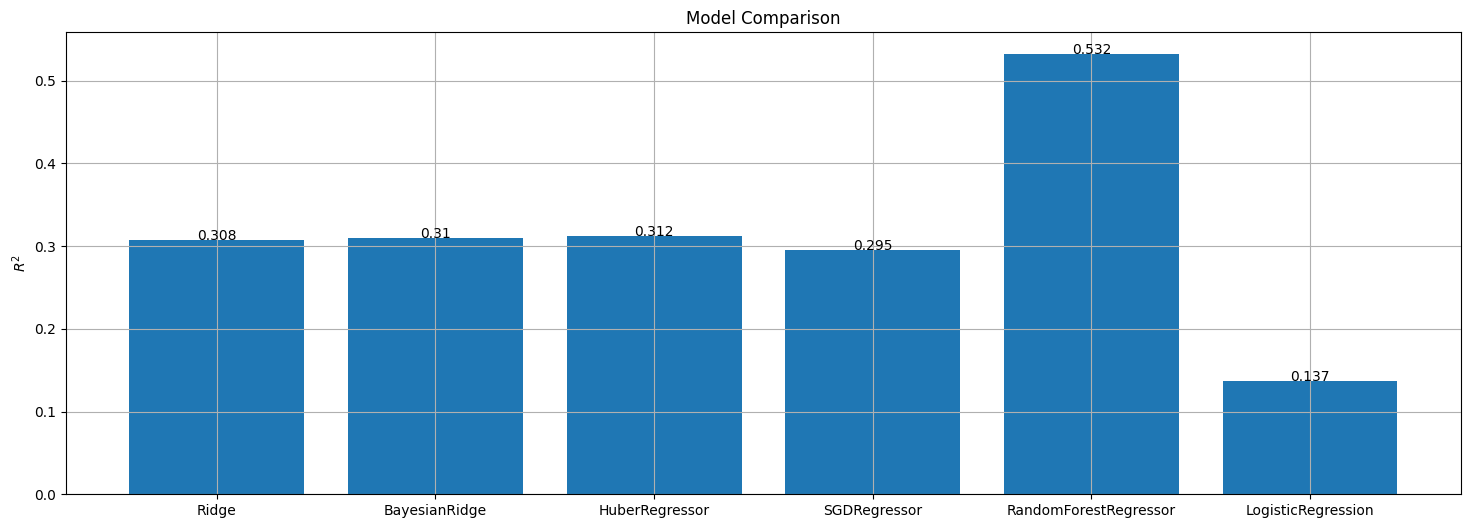

In [114]:
plt.figure(figsize=(18, 6))
bars = plt.bar(test_scores.keys(), test_scores.values())
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center')
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()
plt.show()

- Validación cruzada

In [115]:
model_results_cv = {}
for model_name, model in models.items():
    reg_pipeline = Pipeline([
        ("scalar", StandardScaler()),
        ("numerical_imputer", SimpleImputer(strategy='mean')),
        ("model", model)])
    scores = cross_val_score(reg_pipeline, X, y, cv=5, scoring='r2')
    model_results_cv[model_name] = scores

In [116]:
for model_name, scores in model_results_cv.items():
    print(f"{model_name}: R^2 Mn: {scores.mean()}, R^2 Std: {scores.std()}")

Ridge: R^2 Mn: 0.3168279462605833, R^2 Std: 0.06821520076258372
BayesianRidge: R^2 Mn: 0.3181392026025531, R^2 Std: 0.06572333457639416
HuberRegressor: R^2 Mn: 0.3165888553182036, R^2 Std: 0.06284261788893274
SGDRegressor: R^2 Mn: 0.3158553345256294, R^2 Std: 0.0656581287730704
RandomForestRegressor: R^2 Mn: 0.2973241578523649, R^2 Std: 0.05807409256057205
LogisticRegression: R^2 Mn: 0.17613098556181608, R^2 Std: 0.10006960437640432


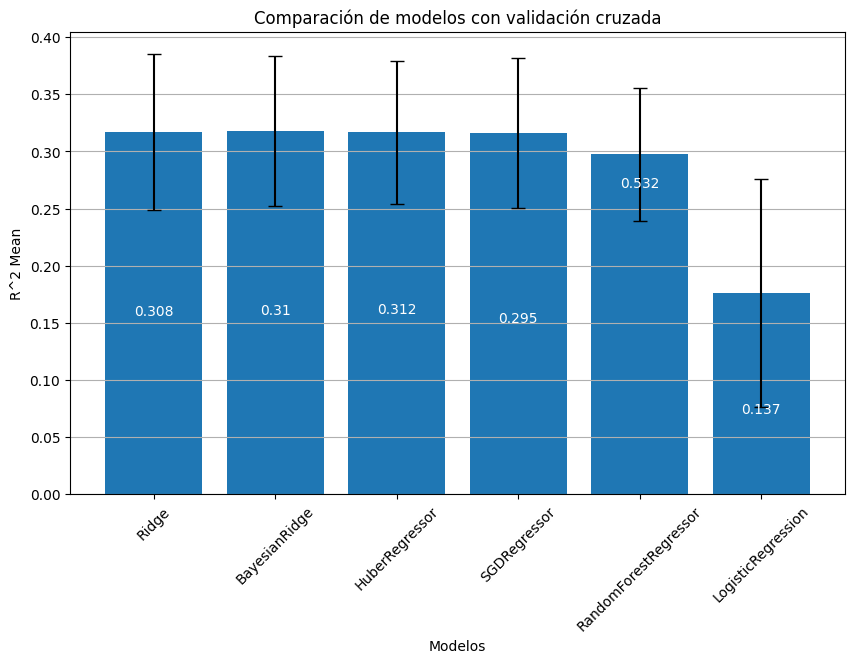

In [117]:
plt.figure(figsize=(10, 6))
plt.bar(model_results_cv.keys(), [scores.mean() for scores in model_results_cv.values()], yerr=[scores.std() for scores in model_results_cv.values()], capsize=5)
plt.xlabel('Modelos')
plt.ylabel('R^2 Mean')
plt.title('Comparación de modelos con validación cruzada')
plt.xticks(rotation=45)
plt.grid(axis='y')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 3), ha='center', va='bottom', color='white')
plt.show()

## Regresión Logística:

- Cargar la base de datos

In [177]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

- Visualización de los primeros registros y la información del dataset


In [178]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- Descripción estadística de los datos y matriz de correlación


In [180]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


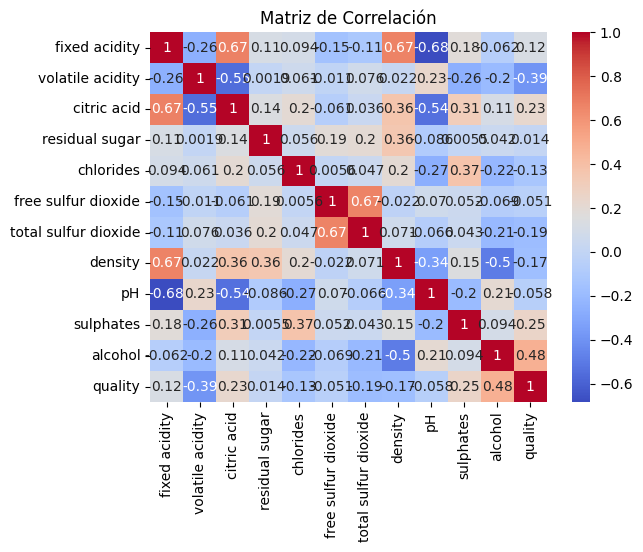

In [181]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

- Crear la variable objetivo categórica 'categorical_quality'


In [182]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [183]:
data['categorical_quality'] = 'Malo'
data.loc[data['quality'] >= 6, 'categorical_quality'] = 'Bueno'

In [184]:
quantile_sulphates = data['sulphates'].quantile(q = 0.96)
data = data[~(data['sulphates']>quantile_sulphates)]
quantile_sulfur_dioxide = data['total sulfur dioxide'].quantile(q = 0.90)
data = data[~(data['total sulfur dioxide']>quantile_sulfur_dioxide)]
data = data.drop('residual sugar', axis=1)
data = data.drop('chlorides', axis=1)

- Eliminar la columna 'quality' y dividir los datos en características (X) y etiquetas (y)


In [185]:
data.drop('quality', axis=1, inplace=True)

In [186]:
X = data.drop('categorical_quality', axis=1)
y = data['categorical_quality']

- Dividir los datos en conjuntos de entrenamiento y prueba


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Entrenar y evaluar el modelo de regresión logística


In [188]:
logistic_model = Perceptron()
logistic_model.fit(X_train, y_train)

Perceptron()

In [189]:
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.26353790613718414
              precision    recall  f1-score   support

       Bueno       0.18      0.78      0.29        36
        Malo       0.00      0.00      0.00       127
     Regular       0.38      0.39      0.39       114

    accuracy                           0.26       277
   macro avg       0.19      0.39      0.22       277
weighted avg       0.18      0.26      0.20       277



C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

- Calcular el AUC-ROC y graficar la curva ROC


In [190]:
y_probs = logistic_model.predict_proba(X_test)[:, 1]
y_test_binary = y_test.map({'Bueno': 1, 'Regular': 0})
roc_auc = roc_auc_score(y_test_binary, y_probs)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)

AttributeError: 'Perceptron' object has no attribute 'predict_proba'

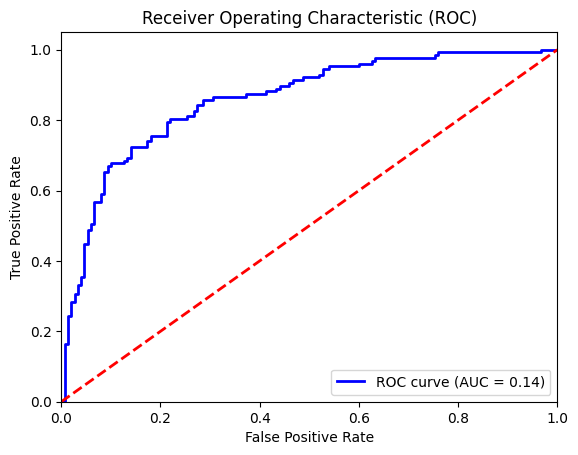

In [ ]:
plt.plot(tpr, fpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

- Visualizar la matriz de confusión

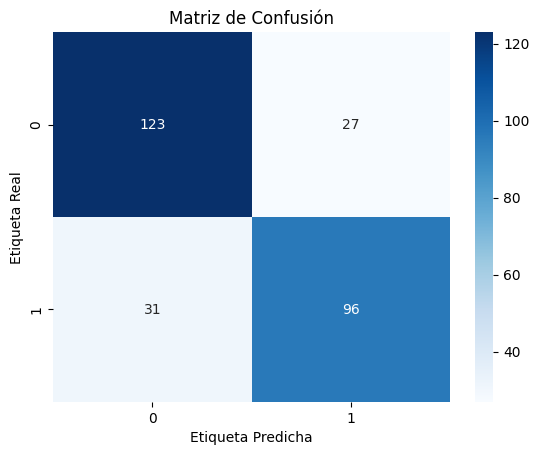

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()